# Modelo de red neuronal tipo Multi Layer Perceptron (MLP)
Aplicado al mercado inmobiliario de la Ciiudad de Valencia.

El objetivo es definir y entrenar una red neuronal, para que prediga el precio de un piso de alquiler, según algunos parámetros de entrada.  
La muestra consta de 15 casos, cuyos datos fueron recopilados de una página de web de alquiler de departamentos, con 8 parámetros de entrada.  Los datos fueron recopilados de una página de web de alquiler de pisos de la Ciudad de Valencia.

### Comencemos a programar
```python
import tensorflow as tf
import matplotlib.pyplot as plt
```
1. `import tensorflow as tf`:  
Esta línea de código importa el paquete `tensorflow` y lo asigna a la abreviatura `tf`.  
TensorFlow es una popular biblioteca de código abierto desarrollada por Google que se utiliza principalmente para tareas de aprendizaje automático y aprendizaje profundo (machine learning y deep learning).   
Al importarla de esta manera, puedes acceder a todas las funciones y módulos proporcionados por TensorFlow utilizando el prefijo `tf`. Esto es una convención común para hacer más conciso y legible el código cuando trabajas con bibliotecas extensas.

2. `import matplotlib.pyplot as plt`:  
Esta línea de código importa el módulo `pyplot` del paquete `matplotlib` y lo asigna a la abreviatura `plt`.   
`matplotlib` es una biblioteca ampliamente utilizada para crear gráficos y visualizaciones en Python.  
Al importar `pyplot` de esta manera, puedes acceder a las funciones de trazado y visualización proporcionadas por `pyplot` utilizando la abreviatura `plt`. Esto también es una convención común para simplificar el código al crear gráficos.

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Definición del Corpus  
La `Definición del Corpus` en el contexto de redes neuronales y procesamiento de lenguaje natural se refiere a la creación y especificación de un conjunto de datos, conocido como **corpus**, que se utilizará para entrenar, validar o probar un modelo de una red neuronal diseñada para tareas relacionadas con el procesamiento del lenguaje natural o de datos.

Un **corpus** es un conjunto de textos, figuras, audios o datos que se utilizan para entrenar modelos de redes neuronales artificiales. La definición del corpus implica seleccionar cuidadosamente los textos, figuras, audios o datos que reflejan el dominio y el contexto de la tarea en cuestión. Esto incluye la recopilación de datos de fuentes relevantes.

La definición del corpus suele implicar las siguientes consideraciones:

1. **Tamaño del Corpus**: Determinar cuántos datos se necesitan para entrenar un modelo efectivo.

2. **Calidad de los Datos**: Asegurarse de que los datos seleccionados sean de alta calidad y representativos del dominio de la tarea.

3. **Diversidad**: Incluir una variedad de datos para que el modelo pueda generalizar y manejar diferentes situaciones.

4. **Anotaciones**: Decidir si es necesario anotar los datos con información adicional, como etiquetas, entidades, etc.

5. **Preprocesamiento**: Realizar cualquier preprocesamiento necesario en los datos, como la tokenización, eliminación de stopwords y normalización.

6. **División en Conjuntos**: Dividir el corpus en conjuntos de entrenamiento, validación y prueba para evaluar y ajustar el modelo.

La definición del corpus es un paso crítico en el desarrollo de modelos de redes neuronales, ya que la calidad y representatividad de los datos influyen significativamente en el rendimiento y la capacidad de generalización del modelo.

Nuestra red estará entrenada para predecir el precio de un piso de alquiler, según algunos parámetros de entrada.
Los datos fueron recopilados de una página de web de alquiler de dptos, con 8 parámetros de entrada, siendo en total una muestra de 15 casos.
Los parámetros considerados son:  

1. ciudad (0),  
2. m^2,  
3. nº hab,   
4. nº planta,  
5. ascensor (0-1),  (No, Si)
6. exterior (0-1),  (No, Si)
7. estado (0 no rehabilitado, 1 rehab, 2 nuevo),   
8. céntrico (0, 1)  (No, Si)

Y los precios correspondientes.

In [4]:
"""
ciudad (0), m^2, nº hab, nº planta, ascensor (0-1), exterior (0-1),
estado (0 no rehabilitado, 1 rehab, 2 nuevo), céntrico (0, 1)
"""

caracteristicas = [(0, 54, 2, 4, 0, 1, 0, 0),
                   (0, 152, 2, 4, 1, 1, 2, 1),
                   (0, 64, 3, 4, 0, 1, 0, 0),
                   (0, 154, 5, 4, 1, 1, 1, 1),
                   (0, 100, 1, 5, 1, 1, 1, 0),
                   (0, 140, 5, 2, 1, 1, 2, 0),
                   (0, 120, 3, 2, 1, 1, 1, 1),
                   (0, 70, 2, 3, 1, 1, 1, 0),
                   (0, 60, 2, 2, 0, 1, 1, 1),
                   (0, 129, 3, 18, 1, 1, 2, 1),
                   (0, 93, 1, 3, 1, 1, 2, 0),
                   (0, 52, 2, 2, 0, 1, 1, 1),
                   (0, 110, 3, 5, 1, 1, 1, 1),
                   (0, 63, 3, 2, 1, 1, 1, 0),
                   (0, 160, 1, 4, 1, 1, 2, 0)
                    ]

In [5]:
precios = [750, 2000, 650, 1500, 900, 1000, 1300, 750, 900, 1800, 975, 880, 1400, 750, 1050]

## Definimos la neurona
### Primeramente las capas
Las siguiente sentencias son parte de la creación de una red neuronal utilizando TensorFlow, la biblioteca de aprendizaje automático en Python.
```python
capaEntrada = tf.keras.layers.Dense(units=8, input_shape=[8])
capaOculta  = tf.keras.layers.Dense(units=8)
capaSalida  = tf.keras.layers.Dense(units=1)
```

Estas líneas de código definen tres capas para una red neuronal.  
A continuación, se explica cada una de ellas:

1. `capaEntrada = tf.keras.layers.Dense(units=8, input_shape=[8])`: Esta línea crea una capa de entrada para la red neuronal. Aquí está lo que hace:
   - `tf.keras.layers.Dense`: Esta parte del código crea una capa densa, que es una capa completamente conectada. Cada unidad (neurona) en esta capa estará conectada a cada unidad de la capa siguiente.
   - `units=8`: Esta capa de entrada tiene 8 unidades, es decir 8 neuronas. Cada unidad representará una característica o una entrada en los datos. En este caso se corresponde con las 8 características con que son analizados los departamentos.
   - `input_shape=[8]`: Esta parte especifica la forma de entrada de los datos. En este caso, significa que cada muestra de datos tendrá 8 características (o valores de entrada).

2. `capaOculta = tf.keras.layers.Dense(units=8)`: Esta línea crea una capa oculta en la red neuronal. La capa oculta tiene las siguientes características:
   - `tf.keras.layers.Dense`: Al igual que en la capa de entrada, esta parte del código crea una capa densa.
   - `units=8`: La capa oculta también tiene 8 unidades, lo que significa que tiene 8 neuronas en esta capa.

3. `capaSalida = tf.keras.layers.Dense(units=1)`: Esta línea crea la capa de salida de la red neuronal. La capa de salida tiene las siguientes características:
   - `tf.keras.layers.Dense`: Crea una capa densa.
   - `units=1`: En este caso, la capa de salida tiene una sola unidad, lo que es común en problemas de regresión, donde el objetivo es predecir un valor numérico único.

Estas sentencias definen las capas de una red neuronal con una capa de entrada, una capa oculta y una capa de salida. Las unidades en cada capa representan neuronas que procesarán los datos y aprenderán a realizar tareas específicas, como la clasificación o la regresión, según el tipo de problema que estés abordando.

In [6]:
capaEntrada = tf.keras.layers.Dense(units=8, input_shape=[8])
capaOculta  = tf.keras.layers.Dense(units=8)
capaSalida  = tf.keras.layers.Dense(units=1)

### Definimos el modelo

La sentencia `tf.keras.Sequential([capaEntrada, capaOculta, capaSalida])` se utiliza para crear una red neuronal secuencial en TensorFlow utilizando la API de alto nivel de Keras.

```python
Mi_modelo = tf.keras.Sequential([capaEntrada, capaOculta, capaSalida])
```
Este es su significado:

- `tf.keras.Sequential`: `tf.keras.Sequential` es una clase que permite definir redes neuronales secuenciales en TensorFlow. Las redes secuenciales son una arquitectura de red común en la que las capas se apilan secuencialmente, de manera que la salida de una capa es la entrada de la siguiente.

- `[capaEntrada, capaOculta, capaSalida]`: En esta parte del código, se crea una lista que contiene tres capas: `capaEntrada`, `capaOculta` y `capaSalida`. Estas son las capas previamente definidas, la capa de entrada representa la entrada de la red, la capa oculta es una capa intermedia y la capa de salida representa la salida de la red.

- El objeto `tf.keras.Sequential` se inicializa con esta lista de capas. Al hacerlo, se define la arquitectura de la red neuronal secuencial de manera que los datos de entrada fluyen secuencialmente a través de las capas, comenzando por la capa de entrada, pasando por la capa oculta y finalmente llegando a la capa de salida.

- Esta estructura secuencial permite la fácil construcción y entrenamiento de redes neuronales en un formato claro y legible. Cuando se llama a métodos como `compile` y `fit` en el objeto `tf.keras.Sequential`, la red se configura para entrenamiento y se entrena con los datos de entrada y salida proporcionados.


In [16]:
Mi_modelo = tf.keras.Sequential([capaEntrada, capaOculta, capaSalida])

### Compilación
La sentencia `Mi_modelo.compile(...)` se utiliza para configurar y compilar un modelo de red neuronal en TensorFlow/Keras antes de entrenarlo.
```python
Mi_modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)
```

1. `Mi_modelo` se refiere a nuestro modelo de red neuronal, que definimos anteriormente. Esta es la red que deseas entrenar.

2. `.compile(...)`: Este método es utilizado para configurar y compilar el modelo antes de comenzar el proceso de entrenamiento.

3. `optimizer = tf.keras.optimizers.Adam(0.1)`: Aquí se especifica el optimizador que se utilizará durante el entrenamiento. En este caso, se está utilizando el optimizador Adam con una tasa de aprendizaje (learning rate) de 0.1. El optimizador Adam es un algoritmo de optimización ampliamente utilizado en el entrenamiento de redes neuronales. La tasa de aprendizaje determina cuánto se ajustan los pesos de la red en cada paso durante el entrenamiento.

4. `loss = 'mean_squared_error'`: Aquí se especifica la función de pérdida que se utilizará para medir cuán bien se ajusta el modelo a los datos durante el entrenamiento. En este caso, se está utilizando la función de pérdida de error cuadrático medio (mean squared error), que es común en problemas de regresión, donde el objetivo es predecir un valor numérico. La función de pérdida mide la discrepancia entre las predicciones del modelo y los valores reales en los datos de entrenamiento.

Una vez que se ha configurado el modelo con el optimizador y la función de pérdida, estará listo para el entrenamiento. Podemos proceder a entrenar el modelo llamando al método `fit()` en el objeto `Mi_modelo`, proporcionando los datos de entrenamiento y otras configuraciones necesarias.

In [17]:
Mi_modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

### Entrenamiento
A la sentencia `Mi_modelo.fit(caracteristicas, precios, epochs=600, verbose=0)` la utilizaremos para entrenar el modelo de red neuronal en TensorFlow/Keras.
```python
%%time
print('Inicio de entrenamiento...')
Mi_historial = Mi_modelo.fit(caracteristicas, precios, epochs=600, verbose=0) #False)
print('Modelo entrenado!')
```
1. El comando `%%time` es una `magic command` que se utiliza para medir el tiempo de ejecución de una celda de código específica. Cuando colocas `%%time` al comienzo de una celda y luego ejecutas esa celda, Jupyter mostrará información sobre cuánto tiempo le llevó ejecutar ese código.

Este comando es útil para evaluar el rendimiento de tu código y para identificar secciones que podrían estar ralentizando tu programa. La información que obtendrás incluye:

    Tiempo total de ejecución: El tiempo total que llevó ejecutar la celda.
    Tiempo de CPU: El tiempo de la CPU utilizado por el proceso.
    Tiempo de sistema: El tiempo del sistema utilizado por el proceso.
    Tiempo de usuario: El tiempo de usuario utilizado por el proceso.

*No es imprescindible utilizar este comando, pero resulta útil para obtener una idea de los tiempos de entrenamiento.*

2. `.fit(...)`: Este método se utiliza para iniciar el proceso de entrenamiento del modelo. Durante el entrenamiento, el modelo aprenderá a hacer predicciones basadas en los datos proporcionados.

3. `caracteristicas` y `precios`: Estos son los datos de entrada y los valores objetivo que se utilizarán para entrenar el modelo. `caracteristicas` son las características de entrada de tus datos, y `precios` son los valores que el modelo debe aprender a predecir. En términos generales, este es el conjunto de datos que se utilizará para enseñar al modelo a hacer predicciones.

4. `epochs=600`: El argumento `epochs` especifica la cantidad de épocas o iteraciones de entrenamiento. Una época es una pasada completa a través de todos los datos de entrenamiento. En este caso, se han configurado 600 épocas, lo que significa que el modelo pasará por el conjunto de datos 600 veces para aprender de él.

5. `verbose=0`: El argumento `verbose` controla la cantidad de información que se muestra durante el entrenamiento. Cuando `verbose` se establece en 0 o `False`, el entrenamiento se realiza en modo silencioso y no se muestra información en la pantalla a medida que el modelo se entrena. Se puede cambiar este valor para controlar el nivel de detalles que se muestran durante el entrenamiento. Por ejemplo, si establecemos `verbose=1` o `True`, se mostrará información sobre el progreso del entrenamiento en la pantalla`

6. Observemos que el método `fit` lo asociamos a la variable `Mi_historial`, el cual conservará los datos del ajuste.

In [18]:
%%time
print('Inicio de entrenamiento...')
Mi_historial = Mi_modelo.fit(caracteristicas, precios, epochs=600, verbose=0) #False)
print('Modelo entrenado!')

Inicio de entrenamiento...
Modelo entrenado!
CPU times: user 11 s, sys: 445 ms, total: 11.4 s
Wall time: 12.9 s


### Grafico de la función de pérdida
La sentencia `plt.plot(Mi_historial.history['loss'])` se utiliza para trazar (graficar) la evolución de la función de pérdida (loss) durante el entrenamiento de un modelo de red neuronal utilizando la biblioteca Matplotlib.
```python
plt.xlabel('# Época')
plt.ylabel('Mágnitud de pérdida')
plt.plot(Mi_historial.history['loss'])
plt.grid()
plt.show()
```

Aquí está la explicación de esta sentencia:

- `Mi_historial.history['loss']`: Mi_historial contiene información sobre cómo cambian las métricas (como la pérdida) a medida que el modelo se entrena. `Mi_historial.history['loss']` se refiere específicamente a la función de pérdida registrada durante el entrenamiento.

Entonces, cuando ejecutas `plt.plot(Mi_historial.history['loss'])`, estás trazando un gráfico que muestra cómo cambia la función de pérdida a lo largo de las épocas durante el entrenamiento del modelo. Este tipo de gráfico es útil para visualizar la convergencia del modelo durante el entrenamiento. Si la pérdida disminuye a medida que aumentan las épocas, es un indicativo de que el modelo está aprendiendo y mejorando.

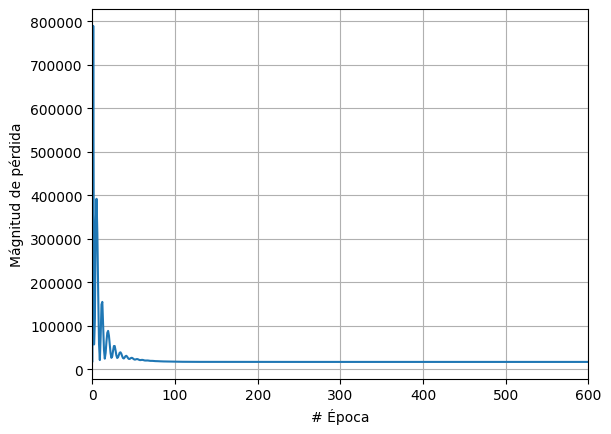

In [20]:
plt.xlabel('# Época')
plt.ylabel('Mágnitud de pérdida')
plt.plot(Mi_historial.history['loss'])
plt.grid()
plt.xlim(0, 600)
plt.show()

### Guardar el modelo entrenado
La sentencia `Mi_modelo.save('pisos_alquiler.h5')` se utiliza para guardar (guardar en disco) un modelo de red neuronal entrenado en un archivo con formato H5 (HDF5).
```python
Mi_modelo.save('pisos_alquiler.h5')
```

- `save('pisos_alquiler.h5')`: El método `.save()` se llama en el objeto `Mi_modelo` y toma como argumento el nombre del archivo donde deseas guardar el modelo. En este caso, el modelo se guardará en un archivo llamado `'pisos_alquiler.h5'`.

El formato H5 (HDF5) es un formato de archivo comúnmente utilizado para almacenar modelos de redes neuronales y datos científicos en general. Guardar un modelo es útil cuando deseas conservar el trabajo realizado durante el entrenamiento, de modo que puedas cargar y utilizar el modelo en el futuro sin tener que volver a entrenarlo desde cero.

Cuando guardas un modelo en un archivo H5, también puedes cargarlo posteriormente utilizando el método `.load_model()` de Keras/TensorFlow. Esto es útil para hacer predicciones con el modelo guardado o para continuar entrenando el modelo en un momento posterior sin necesidad de volver a entrenar desde el principio.


### El Formato HDF5  
El formato HDF5 (Hierarchical Data Format version 5) es un formato de archivo utilizado para almacenar y organizar datos en una estructura jerárquica.

- **Jerarquía de datos**: En un archivo HDF5, los datos se organizan en una estructura jerárquica similar a un árbol. Esto significa que puedes tener grupos que contienen conjuntos de datos (datasets) y atributos. Los grupos pueden contener subgrupos, y así sucesivamente, lo que permite una organización eficiente de datos complejos.

- **Tipos de datos**: HDF5 es versátil en cuanto a los tipos de datos que puede almacenar, lo que lo hace adecuado para una amplia gama de aplicaciones científicas y de ingeniería. Puede manejar datos numéricos, cadenas de texto, imágenes, tablas y más.

- **Compresión y escalabilidad**: HDF5 admite la compresión de datos, lo que permite reducir el espacio en disco necesario para almacenar datos. También es escalable, lo que significa que puedes agregar datos a un archivo HDF5 sin necesidad de reescribirlo por completo.

- **Portabilidad**: Los archivos HDF5 son portables, lo que significa que puedes usarlos en diferentes plataformas y lenguajes de programación. Esto hace que sea una elección común para la colaboración científica y el intercambio de datos.

- **Soporte para metadatos**: Puedes adjuntar metadatos (información descriptiva sobre los datos) a conjuntos de datos y grupos en un archivo HDF5. Esto es útil para documentar y etiquetar tus datos.

El formato HDF5 es una elección popular para el almacenamiento de datos científicos y técnicos debido a su flexibilidad, escalabilidad y portabilidad. Se utiliza en diversas disciplinas, como la ciencia de datos, la simulación numérica, la visión por computadora y la bioinformática, entre otras.

In [21]:
Mi_modelo.save('pisos_alquiler.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Testeando el Modelo
La sentencia `Mi_modelo.predict(solicitud)` se utiliza para hacer predicciones utilizando un modelo de red neuronal previamente entrenado.
```python
for idx in range (len(precios)):
  print(' ')
  print('==========================================')
  solicitud = [caracteristicas[idx]]
  print(solicitud, precios[idx])
  print('-----------------------------------------')
  valor = Mi_modelo.predict(solicitud)
  print("El precio del piso %i solicitado tiene un valor de %.2f euros" % (idx,valor))

```
- `.predict(solicitud)`: El método `.predict()` se llama en el objeto `Mi_modelo` y toma como argumento `solicitud`. En este contexto, `solicitud` representa los datos de entrada para los cuales deseas obtener una predicción.  
Estos datos de entrada deben estar en el formato correcto y ser coherentes con las características que el modelo espera, de acuerdo a cómo se entrenó el modelo.

Cuando se ejecuta `Mi_modelo.predict(solicitud)`, el modelo utiliza su estructura y los pesos aprendidos durante el entrenamiento para hacer una predicción basada en los datos de entrada proporcionados en `solicitud`.   
El resultado de esta operación será la predicción del modelo para esos datos, que generalmente se almacena en una variable para su posterior uso o análisis, que en este caso esa variable se llama `valor`.

In [22]:

for idx in range (len(precios)):
  print(' ')
  print('==========================================')
  solicitud = [caracteristicas[idx]]
  print(solicitud, precios[idx])
  print('-----------------------------------------')
  valor = Mi_modelo.predict(solicitud)
  print("El precio del piso %i solicitado tiene un valor de %.2f euros" % (idx,valor))

 
[(0, 54, 2, 4, 0, 1, 0, 0)] 750
-----------------------------------------
1/1 [==============================] - 0s 70ms/step
El precio del piso 0 solicitado tiene un valor de 587.56 euros
 
[(0, 152, 2, 4, 1, 1, 2, 1)] 2000
-----------------------------------------
1/1 [==============================] - 0s 26ms/step
El precio del piso 1 solicitado tiene un valor de 1620.26 euros
 
[(0, 64, 3, 4, 0, 1, 0, 0)] 650
-----------------------------------------
1/1 [==============================] - 0s 26ms/step
El precio del piso 2 solicitado tiene un valor de 610.72 euros
 
[(0, 154, 5, 4, 1, 1, 1, 1)] 1500
-----------------------------------------
1/1 [==============================] - 0s 26ms/step
El precio del piso 3 solicitado tiene un valor de 1547.98 euros
 
[(0, 100, 1, 5, 1, 1, 1, 0)] 900
-----------------------------------------
1/1 [==============================] - 0s 24ms/step
El precio del piso 4 solicitado tiene un valor de 983.01 euros
 
[(0, 140, 5, 2, 1, 1, 2, 0)] 1000
--

## Solicitud de predicción
También tenemos la capacidad de solicitar una predicción de precios para una vivienda que no ha sido parte del entrenamiento. De hecho, nuestro modelo ha sido específicamente entrenado para esta tarea. Todo lo que necesitamos hacer es proporcionar un conjunto de datos que represente la propiedad de nuestro interés.

Este conjunto de datos puede ser generado por otro programa, que podría ser un `frontend` más amigable y claro. Este `frontend` podría realizar preguntas específicas sobre la vivienda que deseamos evaluar, por ejemplo, a través de una página web.

Le preguntemos algunos precios, considerando la codificación original:   
ciudad (0),   
m^2,   
nº hab,   
nº planta,   
ascensor (0-1),   
exterior (0-1),   
estado (0 no rehabilitado, 1 rehab, 2 nuevo),   
céntrico (0, 1)  


In [ ]:
solicitud = [(0, 160, 1, 4, 1, 1, 2, 0)]
valor = Mi_modelo.predict(solicitud)
print("El precio del piso solicitado tiene un valor de %.2f euros" % valor)

1/1 [==============================] - 0s 45ms/step
El precio del piso solicitado tiene un valor de 1249.68 euros


In [ ]:
solicitud = [(0, 110, 3, 4, 1, 1, 1, 0)]
valor = Mi_modelo.predict(solicitud)
print("El precio del piso solicitado tiene un valor de %.2f euros" % valor)


1/1 [==============================] - 0s 81ms/step
El precio del piso solicitado tiene un valor de 958.93 euros


In [ ]:
solicitud = [(0, 110, 3, 4, 1, 1, 1, 1)]
valor = Mi_modelo.predict(solicitud)
print("El precio del piso solicitado tiene un valor de %.2f euros" % valor)

1/1 [==============================] - 0s 45ms/step
El precio del piso solicitado tiene un valor de 1390.72 euros
